<a href="https://colab.research.google.com/github/jyouser/Case-Studies/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  AeroFit Case Study

## 1. Importing Libraries

In [603]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,expon,geom,poisson

## 2. Loading Dataset

In [604]:
df=pd.read_csv("aerofit_treadmill_1.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## 3. Basic Data Analysis

In [605]:
df.shape

(180, 9)

Insights: This dataset contains 180 rows and 9 columns.

In [606]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [607]:
# Get First 5 lines of code
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights: Among 9 columns, 3 belongs to object datatype and 6 belongs to integer datatype. Here there is no date field which is an object. So no need of conversion of datatype.

In [609]:
# Null values in dataset
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Insights: There are no null values for any of the column.

In [610]:
df.isnull().any()

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False


In [611]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


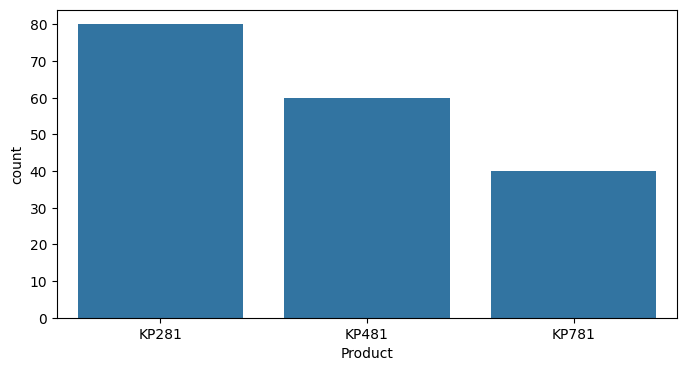

In [612]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Product')
plt.show()

Insights: Among 3 treadmill product types KP281 sales are more.

In [613]:
# Unique values in dataset
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [614]:
# unique values for Product column
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Insights: There are 3 unique product types.

In [615]:
# unique values for Age column
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [616]:
df["Age"].min()

18

In [617]:
df["Age"].max()

50

In [618]:
# describing the data
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights: The age of the customers range from 18 to 50 having average age of 28.78.

In [619]:
# unique values for Gender column
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [620]:
df["Gender"].value_counts()

,count
Gender,
Male,104
Female,76


Insights: Number of Males are higher than Females.

In [621]:
# unique values for Education column
df["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [622]:
# unique values for MaritalStatus column
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [623]:
# unique values for Usage column
df["Usage"].unique()

array([3, 2, 4, 5, 6, 7])

In [624]:
# unique values for Fitness column
df["Fitness"].unique()

array([4, 3, 2, 1, 5])

In [625]:
# unique values for Income column
df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

Insights: May be some outliers exists in Income column.

In [626]:
# unique values for Miles column
df["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

Insights: May be some ouliers exists in Milles column.

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Visual Analysis - Univariate & Bivariate

#### Univariate Analysis

In [628]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


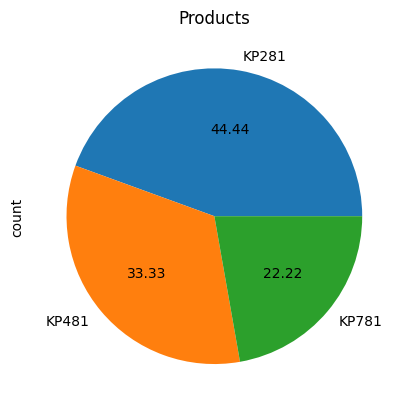

In [629]:
df['Product'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Products")
plt.show()

Insight: 44% of customers brought KP281 product followed by KP481(33%) and then KP781(22%).

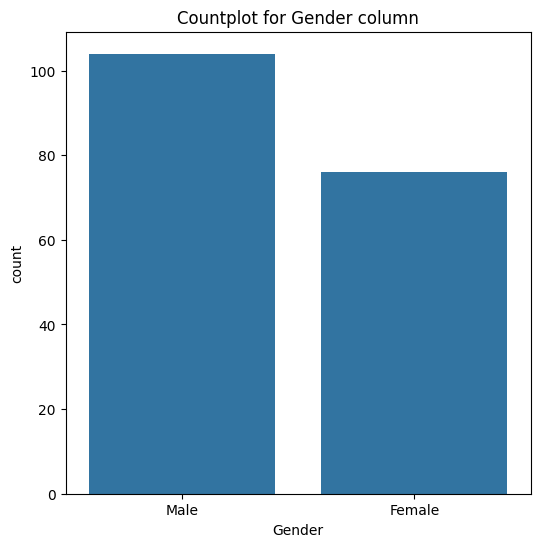

In [630]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Gender')
plt.title("Countplot for Gender column")
plt.show()

Insights: Male customers are more than female customers.

In [631]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


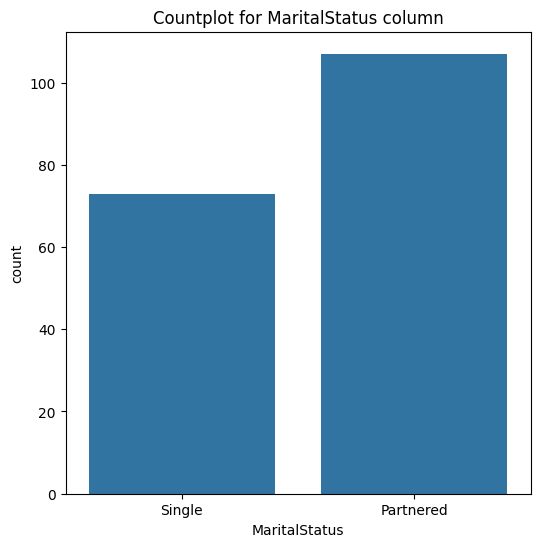

In [632]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='MaritalStatus')
plt.title("Countplot for MaritalStatus column")
plt.show()

Insights: Partnered customers are more than single customers.

#### Distribution of Customer Age

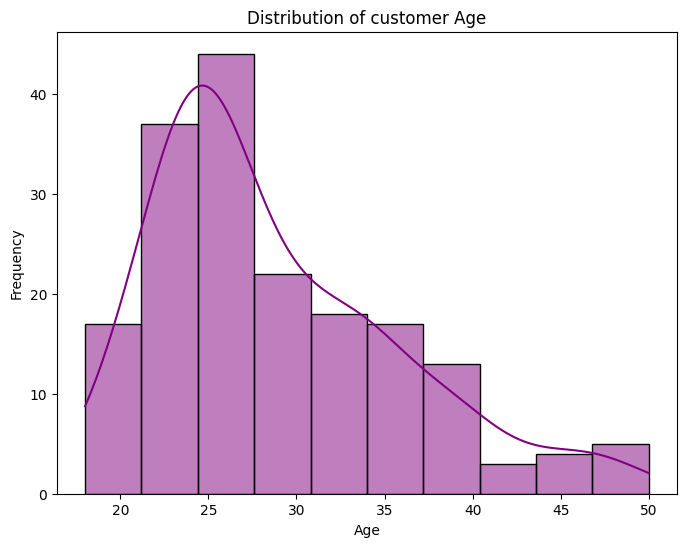

In [633]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Age',bins=10,kde=True,color='purple')
plt.title("Distribution of customer Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insights: Around 25 years of aged people are more who are purchasing our treadmills products.

#### Bivariate Analysis

##### Income vs Product

<Axes: xlabel='Product', ylabel='Income'>

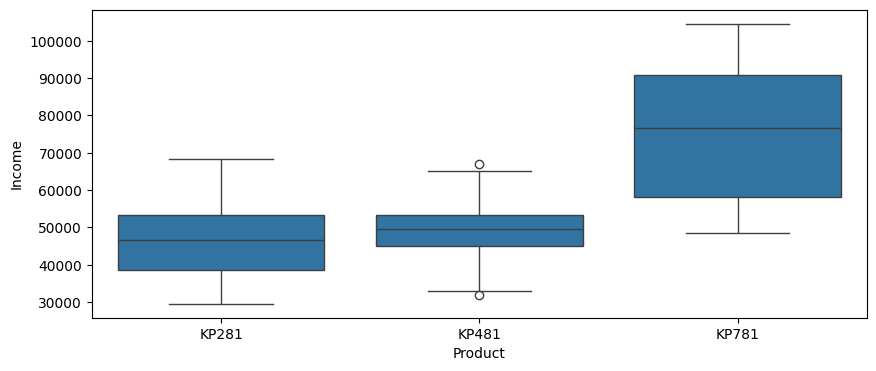

In [634]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x="Product",y="Income")

#### Multi-Variate: Age vs Miles and Income

In [635]:
df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [636]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


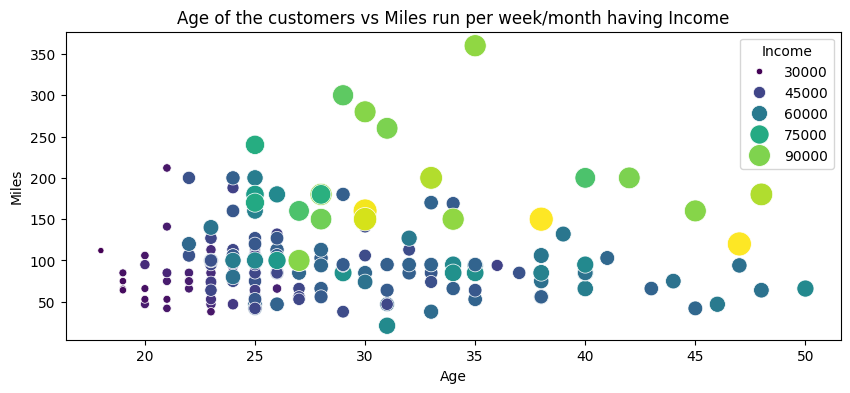

In [637]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Age',y='Miles',hue='Income',palette='viridis',size='Income',sizes=(20,300))
plt.title('Age of the customers vs Miles run per week/month having Income')
plt.xlabel('Age')
plt.ylabel('Miles')
plt.show()

Insights: Around 20-24 years of age people are having less income around 40000 dollars. Around 30-35 years of aged people are having more income around 90000 dollars.

## 4. Detecting Outliers

#### Detect outliers using boxplot

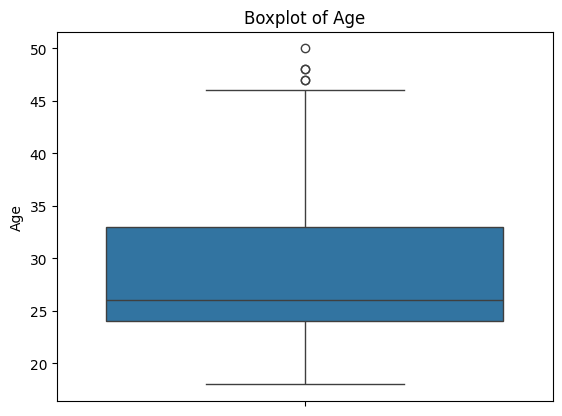

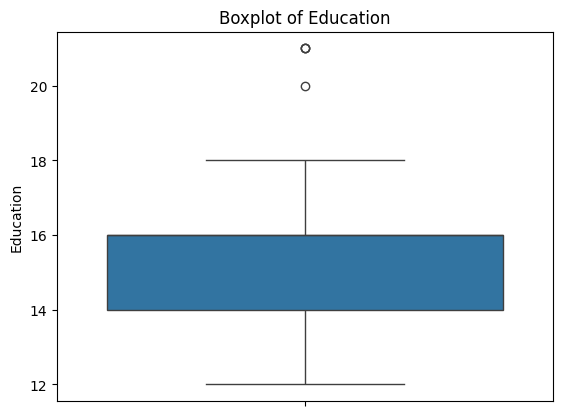

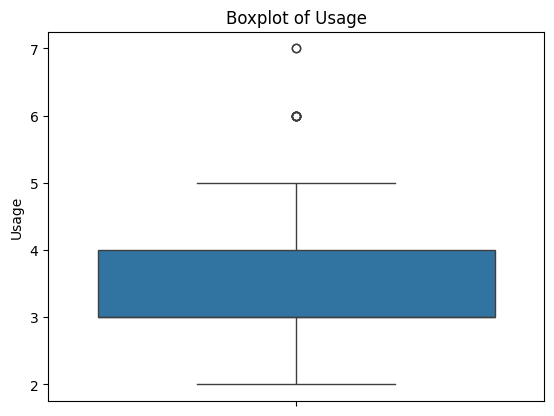

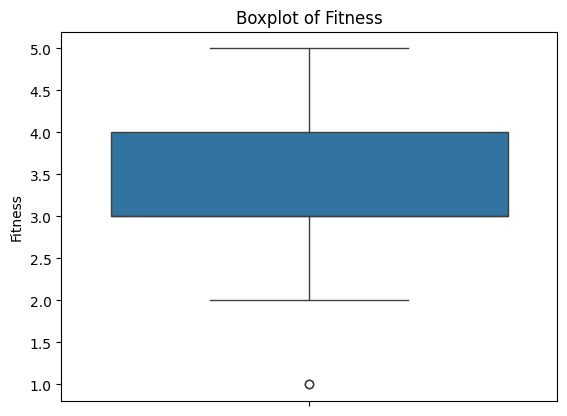

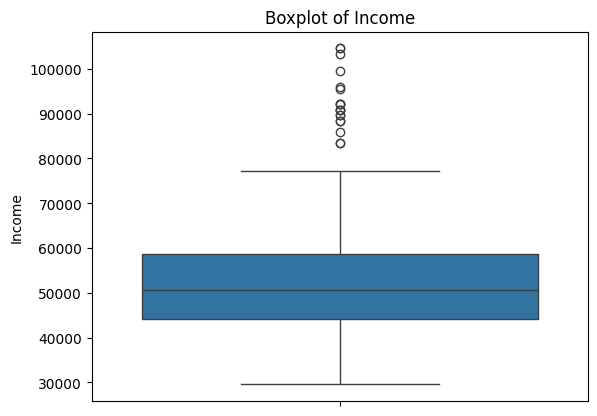

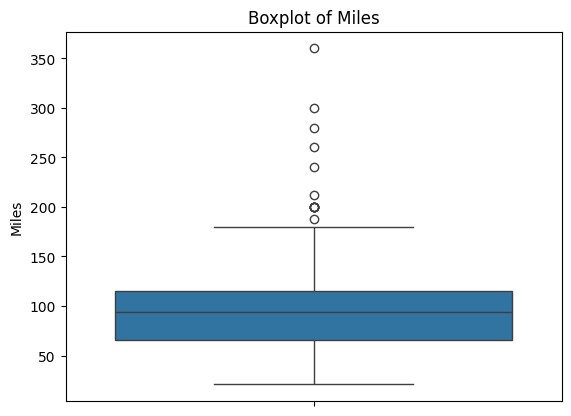

In [638]:
continuous_columns=['Age','Education','Usage','Fitness','Income','Miles']

for col in continuous_columns:
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

#### Cliping/Limiting the data to interval between 5 and 95 percentiles

In [639]:
continuous_columns=['Age','Education','Usage','Fitness','Income','Miles']

for col in continuous_columns:
  lower_limit=np.percentile(df[col],5)
  upper_limit=np.percentile(df[col],95)
  df[col]=np.clip(df[col],lower_limit,upper_limit)

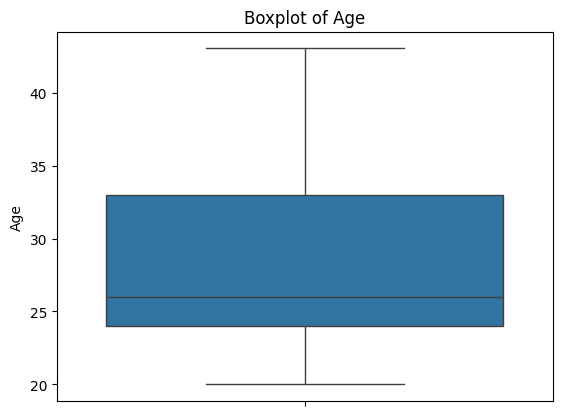

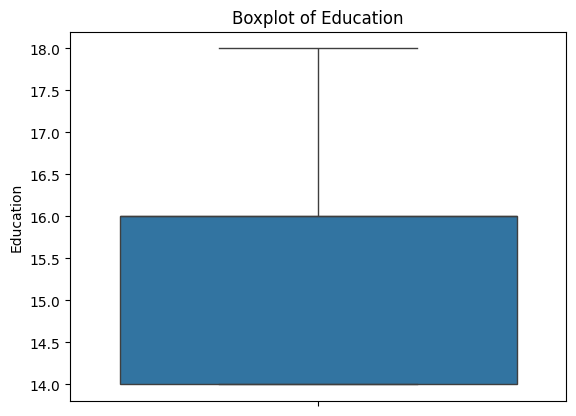

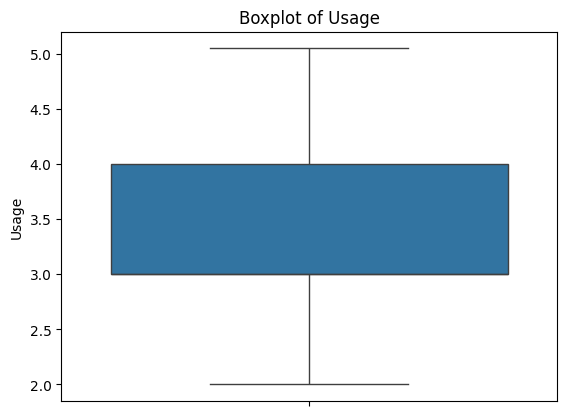

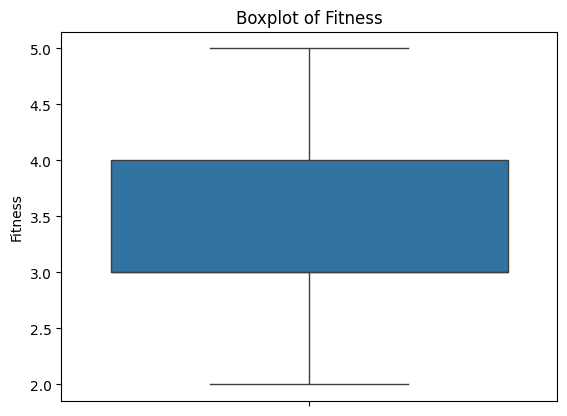

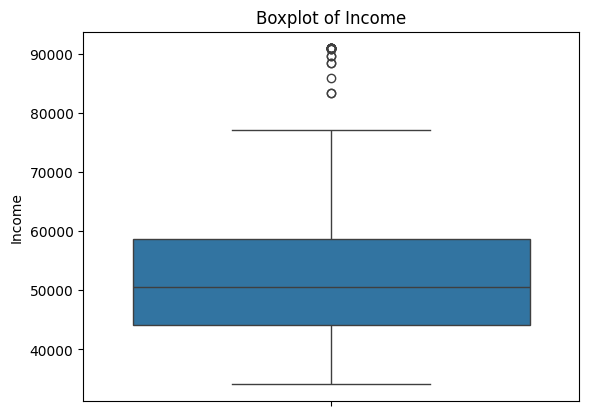

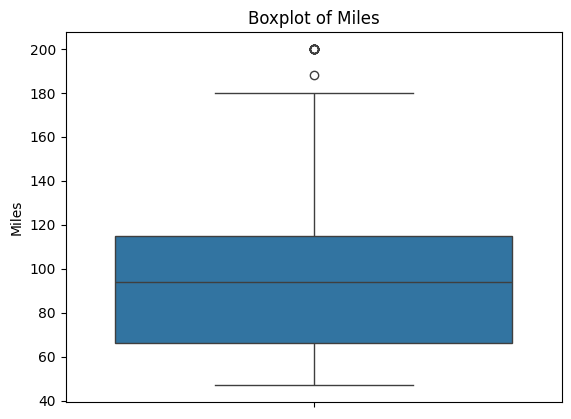

In [640]:
for col in continuous_columns:
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

It is difficult to see one by one graph vertically by scrolling. So we represent as below using subplots.

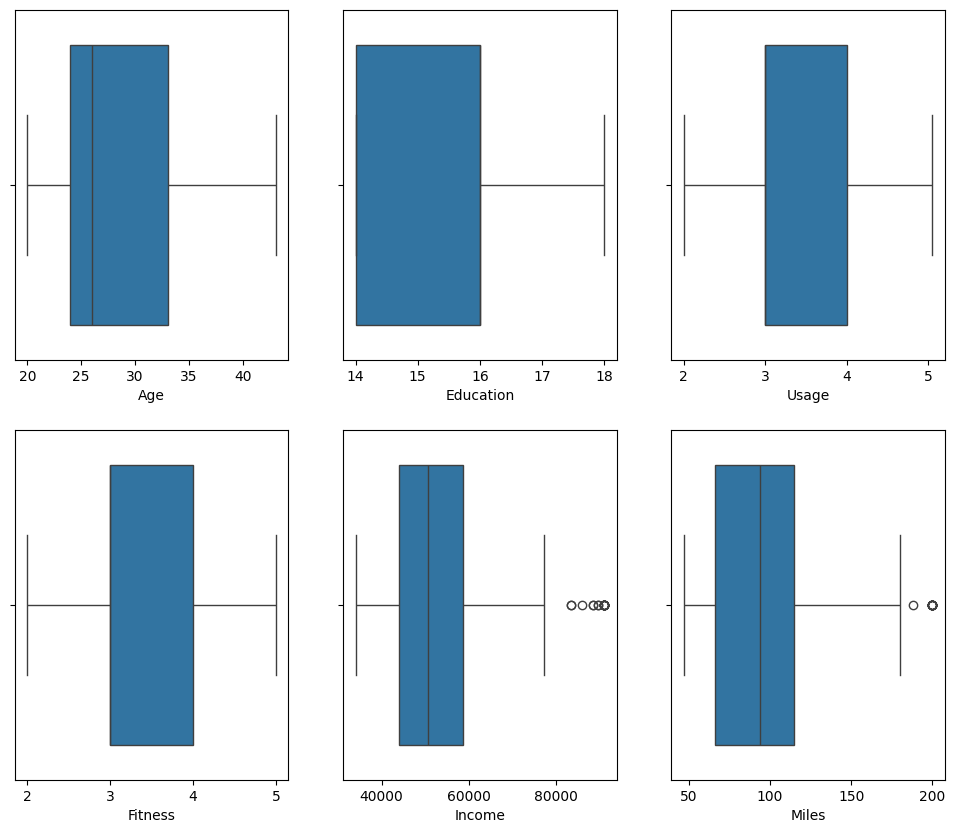

In [641]:
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(12,10))
sns.boxplot(data=df,x='Age',ax=axis[0,0])
sns.boxplot(data=df,x='Education',ax=axis[0,1])
sns.boxplot(data=df,x='Usage',ax=axis[0,2])
sns.boxplot(data=df,x='Fitness',ax=axis[1,0])
sns.boxplot(data=df,x='Income',ax=axis[1,1])
sns.boxplot(data=df,x='Miles',ax=axis[1,2])
plt.show()


Insight: Outliers are limited/removed in boxplot for Age,Education,Usage,Fitness columns and still some outliers are there in Income,Miles columns.

## Categorical Data Analysis

<Axes: xlabel='Product', ylabel='count'>

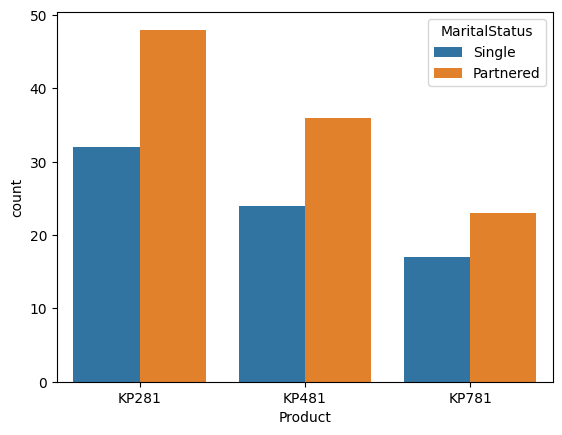

In [642]:
# Categorical columns are marital Status,gender. Using countplot we are counting the frequency of the desired column for each product.
sns.countplot(data=df,x='Product',hue='MaritalStatus')

Insight: Among 3 product types, KP281 product type is having more sales irrespective of marital status.
When we compare people having marital status as 'single' among product types,KP281 will stood first followed by KP481.
Comparing people having marital status as 'Partnered' w.r.t product types,KP281 will stood first followed by KP481.

<Axes: xlabel='Product', ylabel='count'>

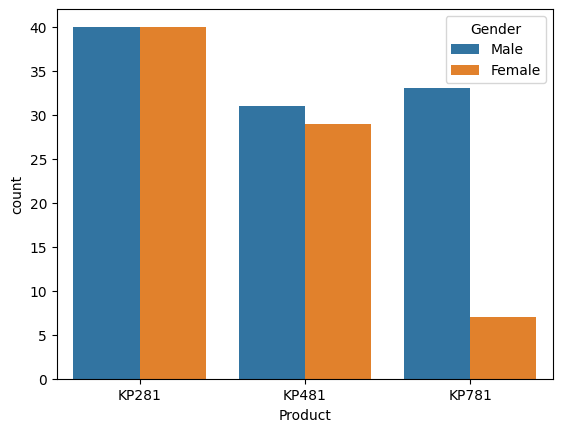

In [643]:
sns.countplot(data=df,x='Product',hue='Gender')

Insight: Insight: Among 3 product types, KP281 product type is having more sales irrespective of Gender. Females and males brought the product type KP281 more. Males brought KP281 product type more followed by KP781 and then KP481.
Females brought KP281 product type more followed by KP481 and then KP781.
KP781 product type is less purchased by females.

## Numerical Data Analysis

<Axes: xlabel='Age', ylabel='Product'>

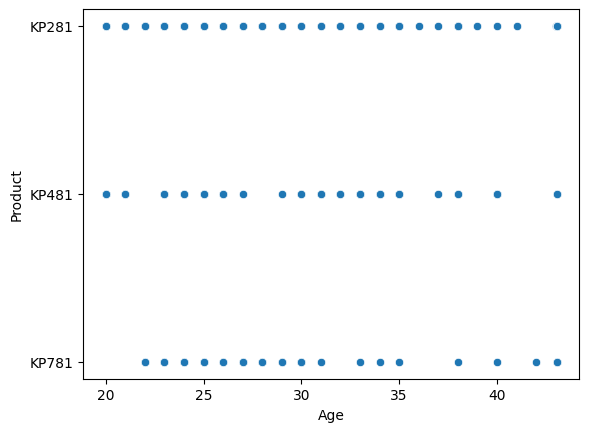

In [644]:
sns.scatterplot(data=df,x='Age',y='Product')

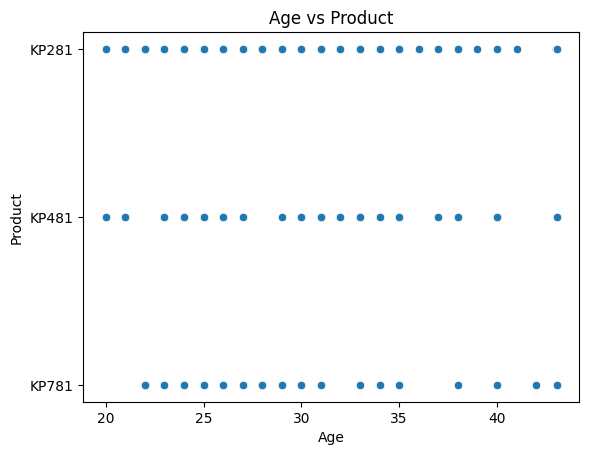

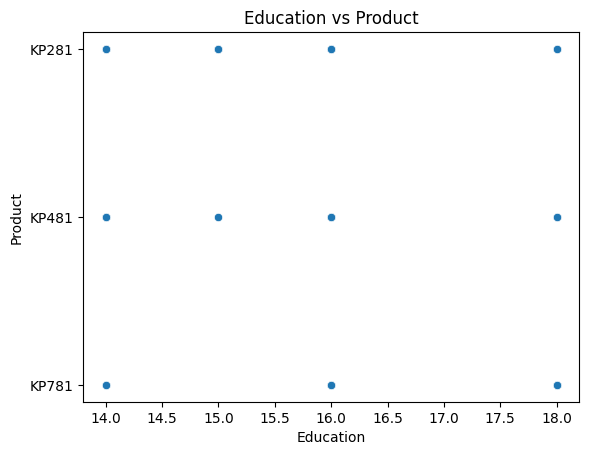

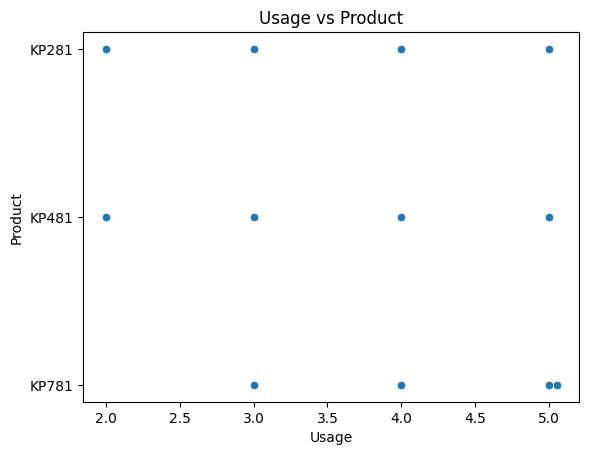

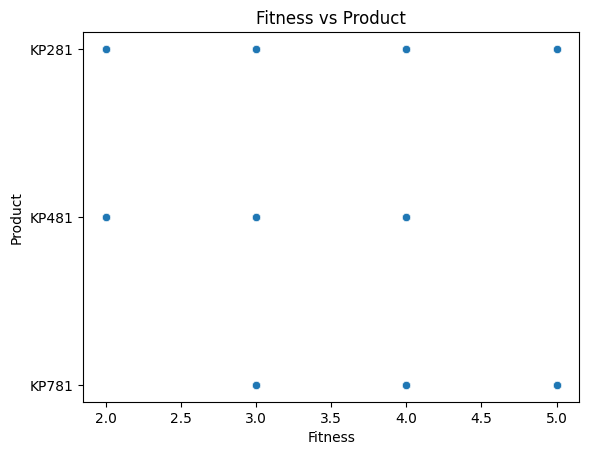

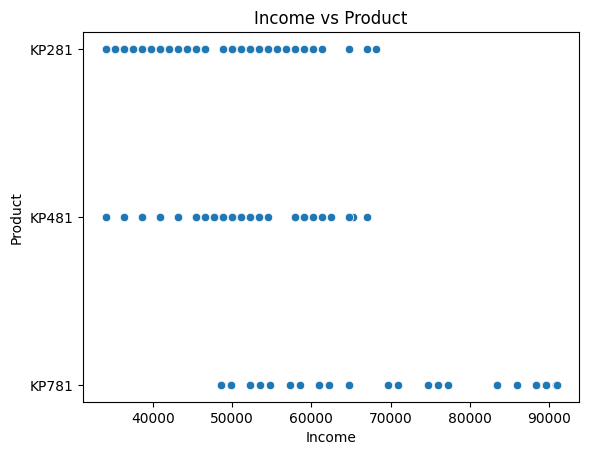

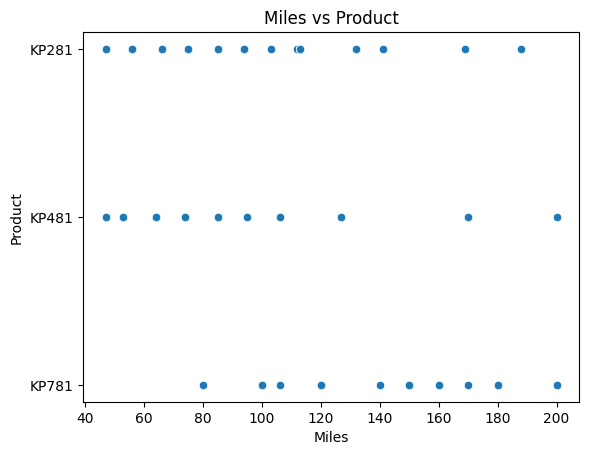

In [645]:
continuous_columns=['Age','Education','Usage','Fitness','Income','Miles']

for col in continuous_columns:
  sns.scatterplot(data=df,x=col,y='Product')
  plt.title(f'{col} vs Product')
  plt.show()

Insights: Linearly scattered.

## Representing the probability

#### Finding Marginal probability

##### What percent of customers have purchased KP281, KP481, or KP781

In [646]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [647]:
df['Product'].value_counts(normalize=True).round(2)

,proportion
Product,
KP281,0.44
KP481,0.33
KP781,0.22


##### Using crosstab

In [648]:
prd_table=pd.crosstab(index=df['Product'],columns='count')
prd_table

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [649]:
prd_table['marginal_probability']=(prd_table['count']/prd_table['count'].sum()).round(2)
prd_table

col_0,count,marginal_probability
Product,,
KP281,80,0.44
KP481,60,0.33
KP781,40,0.22


Insights: Probability of customer purchasing the KP281 product is high i.e., 44% and the product KP781 is having the lowest probability about 22%.

##### Find the probability that the customer buys a product based on Gender column

In [650]:
gen_prob_table=pd.crosstab(df['Gender'], df['Product'], margins=True)
gen_prob_table

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [651]:
gen_prob_table=pd.crosstab(df['Gender'], df['Product'], normalize='index').round(2)
gen_prob_table

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


In [652]:
gen_prob_table=pd.crosstab(df['Gender'], df['Product'], margins=True)
gen_prob_table


Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [653]:
gen_prob_table=pd.crosstab(index=df['Gender'],columns=df['Product'],normalize='index').round(2)*100
gen_prob_table

Product,KP281,KP481,KP781
Gender,,,
Female,53.0,38.0,9.0
Male,38.0,30.0,32.0


Insights: Among all females 53% people brought KP281,38% brought KP481 and only 9% brought KP781.


#### Finding Conditional probability

##### what is the probability that she will purchase a KP481 product

In [654]:
# Given that the customer is female and we have to find the probability that she will purchase KP481 product?
gen_prob_table=pd.crosstab(df['Gender'], df['Product'], margins=True)
gen_prob_table

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [655]:
# Total Females customers
Total_females=gen_prob_table.loc['Female','All']
print(f'p(total females):{Total_females}')

p(total females):76


In [656]:
# Total Females customers who purchase KP481
kp481_females=gen_prob_table.loc['Female','KP481']
kp481_females

np.int64(29)

In [657]:
# Number of females who purchased KP481
print(f'p(KP481|Female) = {kp481_females/Total_females}')

p(KP481|Female) = 0.3815789473684211


Insight: The probability that she will purchase a KP481 product is 0.38

##### Find the probability that a person purchase KP781 having partnered marital status

In [658]:
partner_prod_table=pd.crosstab(df['MaritalStatus'], df['Product'], margins=True)
partner_prod_table

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [659]:
# Total no. of customers who have marital status as partnered
partnered_cust=partner_prod_table.loc['Partnered','All']
partnered_cust
# Total partnered customers who purchase KP781
kp781_part=partner_prod_table.loc['Partnered','KP781']
kp781_part
# Number of customers who are partnered have purchased KP781
print(f'p(KP781|partnered) = {kp781_part/partnered_cust}')

p(KP781|partnered) = 0.21495327102803738


Insight: The probability that a person purchase KP781 having partnered marital status is 0.21

#### Check the correlation among Numerical columns

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Age            180 non-null    float64
 2   Gender         180 non-null    object 
 3   Education      180 non-null    int64  
 4   MaritalStatus  180 non-null    object 
 5   Usage          180 non-null    float64
 6   Fitness        180 non-null    int64  
 7   Income         180 non-null    float64
 8   Miles          180 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 12.8+ KB


In [661]:
df1=df[['Age','Education','Usage','Fitness','Income','Miles']]
df1
correlation_matrix=df1.corr()
correlation_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.057361,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.441082,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.661978,0.481608,0.771030
Fitness,0.057361,0.441082,0.661978,1.000000,0.546998,0.826307
Income,0.514362,0.628597,0.481608,0.546998,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.826307,0.537297,1.000000


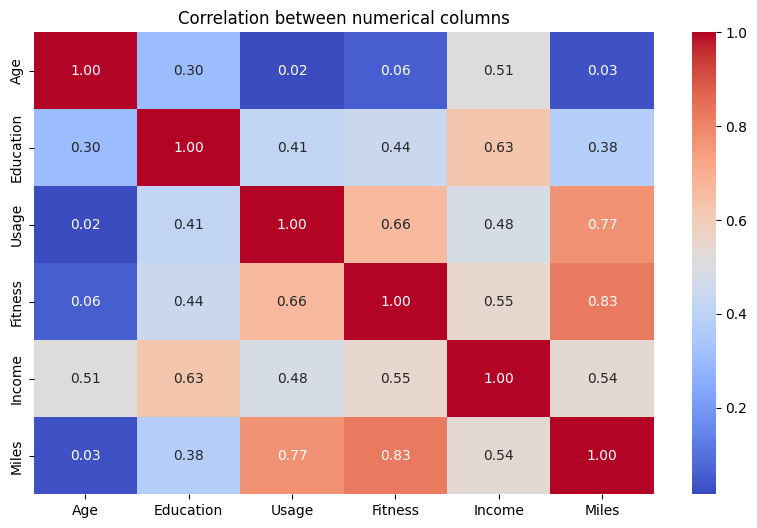

In [662]:
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation between numerical columns')
plt.show()

In [682]:
correlation_matrix*100

,Age,Education,Usage,Fitness,Income,Miles
Age,100.000000,30.197073,1.539413,5.736094,51.436247,2.963618
Education,30.197073,100.000000,41.360007,44.108236,62.859726,37.729354
Usage,1.539413,41.360007,100.000000,66.197773,48.160766,77.102993
Fitness,5.736094,44.108236,66.197773,100.000000,54.699791,82.630723
Income,51.436247,62.859726,48.160766,54.699791,100.000000,53.729663
Miles,2.963618,37.729354,77.102993,82.630723,53.729663,100.000000


Insights: Fitness,Income and Miles are strongly correlated. More educated customers have higher income.

###  Customer profiling and recommendation

Product Type: KP281

In [663]:
kp281_df=df.loc[df['Product']=='KP281'].copy()
kp281_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.00,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.00,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.00,Male,14,Partnered,4.0,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43.00,Male,16,Partnered,3.0,3,53439.00,66
76,KP281,43.05,Female,16,Single,3.0,4,57987.00,75
77,KP281,43.05,Female,16,Partnered,3.0,2,60261.00,47
78,KP281,43.05,Male,16,Partnered,4.0,3,56850.00,94


In [664]:
kp281_df['Age'].value_counts()

,count
Age,
23.00,8
25.00,7
26.00,7
20.00,6
28.00,6
24.00,5
22.00,4
21.00,4
43.05,4


Insights: Maximum age of customers is 23 who are purchasing our treadmill KP281.

In [665]:
kp281_df['Age_group']=pd.cut(kp281_df['Age'],bins=[18,30,40,50,60],labels=['18-30','31-40','41-50','51-69'])
kp281_df['Age_group']

,Age_group
0,18-30
1,18-30
2,18-30
3,18-30
4,18-30
...,...
75,41-50
76,41-50
77,41-50
78,41-50


In [666]:
kp281_df['Age_group'].value_counts()

,count
Age_group,
18-30,55
31-40,19
41-50,6
51-69,0


In [667]:
kp281_df['Gender'].value_counts()

,count
Gender,
Male,40
Female,40


In [668]:
kp281_df['Income_group']=pd.cut(kp281_df['Income'],bins=[0,40000,70000,100000],labels=['Low','Medium','High'])
kp281_df['Income_group']

,Income_group
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
75,Medium
76,Medium
77,Medium
78,Medium


In [669]:
kp281_df['Income_group'].value_counts()

,count
Income_group,
Medium,57
Low,23
High,0


In [670]:
kp281_df['Fitness'].value_counts()

,count
Fitness,
3,54
2,15
4,9
5,2


In [671]:
kp281_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,48
Single,32


In [672]:
kp281_df['Usage'].value_counts()

,count
Usage,
3.0,37
4.0,22
2.0,19
5.0,2


In [675]:
kp281_df['Miles']

,Miles
0,112
1,75
2,66
3,85
4,47
...,...
75,66
76,75
77,47
78,94


In [676]:
kp281_df['Miles'].min()

47

In [677]:
kp281_df['Miles'].max()

188

In [680]:
kp281_df['Miles_group']=pd.cut(kp281_df['Miles'],bins=[45,80,110,140,170,190],labels=['45-80','81-110','111-140','141-170','171-190'])
kp281_df['Miles_group']

,Miles_group
0,111-140
1,45-80
2,45-80
3,81-110
4,45-80
...,...
75,45-80
76,45-80
77,45-80
78,81-110


In [681]:
kp281_df['Miles_group'].value_counts()

,count
Miles_group,
45-80,38
81-110,27
111-140,11
141-170,3
171-190,1


In [685]:
pd.crosstab(kp281_df['Miles_group'],kp281_df['Fitness'])

Fitness,2,3,4,5
Miles_group,,,,
45-80,15,22,1,0
81-110,0,27,0,0
111-140,0,5,6,0
141-170,0,0,2,1
171-190,0,0,0,1


Insights: Fitness 2 and 3 has low millage. The customers are beginners.

Customer Profiling for product KP281 summary:
 - Age Group: customers who are purchasing treadmill KP281 are of age group 18-30 years.
 - Gender: Both males and females are equally purchasing the product.
 - Income Group: customers who are purchasing this product having mid salaried income group range between 40000 to 70000 dollars.
 - Fitness Level: Customer who are brought this product is having fitness level 3.
 - Marital Status: The customers who are partnered are purchasing this product frequenntly than singles. There is no vast difference observed b/w partnered and single.
 - Usage: Most of the customers who had purchased are using 3 times a week.
 - Miles: Most buyers are using less than 110 miles that means they are may be beginners. The people who are actively doing the activity on treadmill(miles>140) are not prefering to buy this product KP281.

### Recommendations:

Recommendations:
 - KP281 will best suit for young adults of age between 18 to 30.
 - Female customers can use this KP281 product easily.
 - Mid salaried employees can buy KP281 treadmill.
 - The customer who are very keen to fitness can buy KP781 treadmil since performance is more.
 - Those who are working professions can use KP481.
 - The company can give some milestones target program and give some offers which can tend to use our product daily and so that our sales will also increase.